Import Libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import random
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import regularizers

In [2]:
CLASS_NAMES = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
FILE_NAME = "icml_face_data.csv"
WHITE_IMAGES = [6458,  7629, 10423, 11286, 13148, 13402, 13988, 15894, 22198, 22927, 28601, 59]

In [3]:
data_path = ["C:/Users/Hicham el Marzgioui/Desktop/AI - Emotion Rec/data"]
file_path = os.sep.join(data_path + [FILE_NAME])
data = pd.read_csv(file_path)
data.drop(' Usage', axis=1, inplace=True)
data = data.drop(index=WHITE_IMAGES, axis=0)

data.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
data.shape

(35875, 2)

In [5]:
data_Angry = data[data['emotion'] == 0]
data_Disgust = data[data['emotion'] == 1]
data_Fear = data[data['emotion'] == 2]
data_Happy = data[data['emotion'] == 3]
data_Sad = data[data['emotion'] == 4]
data_Surprise = data[data['emotion'] == 5]
data_Neutral = data[data['emotion'] == 6]

print(data_Angry.shape)
print(data_Disgust.shape)
print(data_Fear.shape)
print(data_Happy.shape)
print(data_Sad.shape)
print(data_Surprise.shape)
print(data_Neutral.shape)

(4946, 2)
(547, 2)
(5120, 2)
(8988, 2)
(6076, 2)
(4001, 2)
(6197, 2)


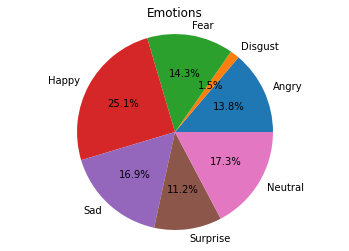

In [6]:
%matplotlib inline

sizes = [data_Angry.shape[0], data_Disgust.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]
# labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise']

fig, ax = plt.subplots()
ax.pie(sizes, labels=CLASS_NAMES, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions')


plt.show()

In [7]:
data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust
data_exclude_disgust.shape

(35328, 2)

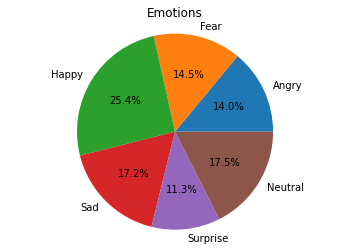

In [8]:
%matplotlib inline

sizes = [data_Angry.shape[0], data_Fear.shape[0], data_Happy.shape[0], data_Sad.shape[0], data_Surprise.shape[0], data_Neutral.shape[0]]
labels = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral' ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions')


plt.show()

In [9]:
data_Surprise.shape

(4001, 2)

In [10]:
from sklearn.utils import shuffle


data_Angry_minimised = data_Angry.iloc[: data_Surprise.shape[0]]
data_Fear_minimised = data_Fear.iloc[: data_Surprise.shape[0]]
data_Happy_minimised = data_Happy.iloc[: data_Surprise.shape[0]]
data_Sad_minimised = data_Sad.iloc[: data_Surprise.shape[0]]
data_Surprise_minimised = data_Surprise.iloc[: data_Surprise.shape[0]]
data_Neutral_minimised = data_Neutral.iloc[: data_Surprise.shape[0]]

data_minimised = pd.concat([data_Angry_minimised, data_Fear_minimised, data_Happy_minimised, data_Sad_minimised, data_Surprise_minimised, data_Neutral_minimised])
data_minimised = shuffle(data_minimised)
# data_minimised = data_minimised.reindex(range(1,data_minimised.shape[0])) # Will reindex so the list has descending order, don't know if necessary
print(data_minimised.emotion.value_counts())
print(data_minimised.head()) # This dataset contains the no emotion disgust and is minimesed to the size of surpirse


0    4001
2    4001
3    4001
4    4001
5    4001
6    4001
Name: emotion, dtype: int64
       emotion                                             pixels
13910        6  159 135 106 77 49 19 29 15 3 1 1 1 1 2 6 11 37...
4075         3  44 48 47 61 68 51 51 55 43 52 60 50 57 72 60 5...
20274        6  36 34 41 45 46 42 44 43 51 52 58 71 86 106 102...
13242        6  21 21 21 28 30 37 39 41 41 40 42 41 47 48 50 5...
8158         5  255 216 57 60 65 60 57 60 70 116 121 129 153 1...


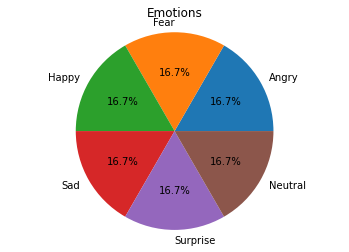

In [11]:
%matplotlib inline

sizes = [data_Angry_minimised.shape[0], data_Fear_minimised.shape[0], data_Happy_minimised.shape[0], data_Sad_minimised.shape[0], data_Surprise_minimised.shape[0], data_Neutral_minimised.shape[0]]
labels = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral' ]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Emotions')


plt.show()

In [12]:
data.shape

(35875, 2)

In [13]:
X_data_minimised = data_minimised[data.columns[1]]
y_data_minimised = data_minimised[data.columns[0]]

X_train_minimised, X_test_minimised, y_train_minimised, y_test_minimised = train_test_split(X_data_minimised, y_data_minimised, test_size=0.2)

X_train_minimised

1077     162 165 102 3 8 8 6 4 3 8 19 36 60 81 91 91 90...
1677     25 32 27 27 41 49 62 65 48 41 51 55 65 70 70 7...
19138    132 129 57 40 41 21 23 33 63 83 93 102 110 119...
13693    72 93 118 137 150 171 179 176 172 167 151 134 ...
14387    48 45 64 82 91 122 144 150 159 165 165 171 175...
                               ...                        
11028    37 31 24 23 27 22 25 35 36 26 33 30 24 21 29 3...
1926     94 94 102 128 164 173 159 146 137 138 150 170 ...
497      255 255 255 254 255 236 167 149 150 137 148 13...
10557    107 100 80 79 94 96 78 91 83 82 76 69 70 75 73...
16895    96 108 93 79 86 82 105 99 70 72 70 64 93 85 81...
Name:  pixels, Length: 19204, dtype: object

In [14]:
data_Happy.shape[0] # Most rows in dataset

8988

In [15]:
data_Angry_Maximised = data_Angry.sample(data_Happy.shape[0], replace=True)
data_Fear_Maximised = data_Fear.sample(data_Happy.shape[0], replace=True)
data_Sad_Maximised = data_Sad.sample(data_Happy.shape[0], replace=True)
data_Surprise_Maximised = data_Surprise.sample(data_Happy.shape[0], replace=True)
data_Neutral_Maximised = data_Neutral.sample(data_Happy.shape[0], replace=True)

data_maximised = pd.concat([data_Angry_Maximised,data_Fear_Maximised,data_Happy,data_Sad_Maximised,data_Surprise_Maximised,data_Neutral_Maximised])
data_maximised = shuffle(data_maximised)

print(data_maximised.emotion.value_counts())
print(data_maximised.head())

0    8988
2    8988
3    8988
4    8988
5    8988
6    8988
Name: emotion, dtype: int64
       emotion                                             pixels
24348        0  148 148 148 148 148 144 141 143 140 139 142 13...
15771        0  144 149 129 114 119 124 125 135 145 141 147 15...
21408        5  248 248 248 247 247 247 248 248 248 247 247 24...
5607         0  143 164 149 110 71 17 48 125 128 128 136 128 8...
9964         2  210 196 226 214 189 218 219 214 203 138 168 19...


In [32]:
# pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

data_exclude_disgust = data[data['emotion'] != 1] # Drops the emotion Disgust

X = data_exclude_disgust.drop('emotion', axis='columns')
y = data_exclude_disgust['emotion']

ros = RandomOverSampler()
rus = RandomUnderSampler()

# smote = SMOTE()
# X_sm, y_sm = smote.fit_resample(X,y)

X_ros, y_ros = ros.fit_resample(X,y) # This data is oversampled
X_rus, y_rus = rus.fit_resample(X,y) # This data is undersampled

print(y_ros.value_counts())
print(y_rus.value_counts())


0    8988
2    8988
3    8988
4    8988
5    8988
6    8988
Name: emotion, dtype: int64
0    4001
2    4001
3    4001
4    4001
5    4001
6    4001
Name: emotion, dtype: int64
